In [7]:
import numpy as np

X = np.load('/content/EM_data.npy')
print(X.shape)
print(X[:5])


(10000, 2)
[[ 0.76385657  0.56719573]
 [ 0.22108421 -1.49761106]
 [-2.11695719  0.59063666]
 [ 0.05264017 -0.7055656 ]
 [ 0.32165244 -0.25463174]]


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split

In [9]:
#ls -l .

### 1. Load the dataset

In [10]:
## Load the datasset from "EM_data.npy"
X = np.load("/content/EM_data.npy")

In [11]:
### Configuration
# User can change this value to experiment with different numbers of components
N_COMPONENTS = 8

In [12]:
from sklearn.mixture import GaussianMixture
import pandas as pd

results = []

for k in range(1, 11):
    gmm = GaussianMixture(n_components=k, covariance_type='full', random_state=0)
    gmm.fit(X)

    log_likelihood = gmm.score(X) * len(X)
    bic = gmm.bic(X)

    results.append({
        "N_COMPONENTS": k,
        "Total_Log_Likelihood": log_likelihood,
        "BIC": bic
    })

df_results = pd.DataFrame(results)
df_results


,N_COMPONENTS,Total_Log_Likelihood,BIC
0,1,-33201.823959,66449.699620
1,2,-32324.910199,64751.134142
2,3,-32303.825724,64764.227234
3,4,-31967.653684,64147.145197
4,5,-31684.085913,63635.271697
5,6,-31676.030855,63674.423622
6,7,-31684.627843,63746.879641
7,8,-31692.372883,63817.631763
8,9,-31695.707281,63879.562601
9,10,-31684.950213,63913.310508


In [13]:
best_row = df_results.loc[df_results["BIC"].idxmin()]
best_row


,4
N_COMPONENTS,5.000000
Total_Log_Likelihood,-31684.085913
BIC,63635.271697


In [14]:
best_k = int(best_row["N_COMPONENTS"])
best_gmm = GaussianMixture(n_components=best_k, covariance_type="full", random_state=0)
best_gmm.fit(X)

print("MEANS:\n", best_gmm.means_)
print("\nCOVARIANCES:\n", best_gmm.covariances_)
print("\nWEIGHTS:\n", best_gmm.weights_)


MEANS:
 [[-0.01522896  0.05311563]
 [-1.8649499  -0.05999758]
 [-0.08767883  1.80697501]
 [-0.00928692 -1.69195776]
 [ 1.81170248  0.03655754]]

COVARIANCES:
 [[[ 0.35011255 -0.01161943]
  [-0.01161943  0.2925101 ]]

 [[ 0.4560476   0.28265065]
  [ 0.28265065  0.49831127]]

 [[ 0.74433777  0.02268227]
  [ 0.02268227  0.39360144]]

 [[ 0.44926624 -0.28075997]
  [-0.28075997  0.54130771]]

 [[ 0.41996411 -0.04241222]
  [-0.04241222  0.81653335]]]

WEIGHTS:
 [0.2627129  0.28141103 0.19457865 0.10968392 0.15161351]


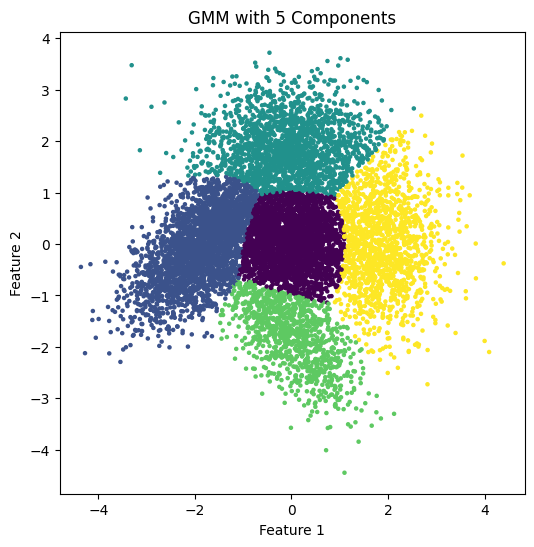

In [15]:
import matplotlib.pyplot as plt

labels = best_gmm.predict(X)

plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c=labels, s=5)
plt.title(f"GMM with {best_k} Components")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


### 2. GMM Training (EM Algorithm)

In [16]:
print(f"\n--- Training GMM with {N_COMPONENTS} components (EM Algorithm) ---")
N_SAMPLES = X.shape[0]

# Initialize the GaussianMixture model
gmm = GaussianMixture(n_components=N_COMPONENTS,
                      covariance_type='full',
                      max_iter=100,
                      random_state=42)

# Fit the model to the data (executes the EM steps)
gmm.fit(X)


--- Training GMM with 8 components (EM Algorithm) ---


GaussianMixture(n_components=8, random_state=42)

### 3. Parameter Extraction and Log-Likelihood

In [17]:
# Get the final log-likelihood (the maximization goal of the EM algorithm)
log_likelihood = gmm.score(X) * N_SAMPLES
bic = gmm.bic(X) # Bayesian Information Criterion (for model selection)

print("\n--- Final Learned GMM Parameters ---")
print(f"1. Component Weights (Priors):\n{gmm.weights_}")
print(f"\n2. Component Means (Centers):\n{gmm.means_}")
print(f"\n3. Component Covariances:\n{gmm.covariances_}")
print(f"\n--- EM Algorithm Results ---")
print(f"Final Average Log-Likelihood per sample: {gmm.score(X):.4f}")
print(f"Total Log-Likelihood (Data Likelihood): {log_likelihood:.2f}")
print(f"Bayesian Information Criterion (BIC): {bic:.2f}")


--- Final Learned GMM Parameters ---
1. Component Weights (Priors):
[0.11231912 0.11626667 0.16491789 0.1580242  0.06763984 0.14885657
 0.15357319 0.07840253]

2. Component Means (Centers):
[[-0.21844186 -0.50963724]
 [ 1.85003564 -0.26690299]
 [ 0.16118655  0.26076632]
 [-1.39995928  0.39433881]
 [ 1.32051288  1.38695092]
 [-2.21516387 -0.49187281]
 [-0.25309492  1.86760217]
 [ 0.1422767  -1.98747985]]

3. Component Covariances:
[[[ 3.00796978e-01  2.71684423e-03]
  [ 2.71684423e-03  2.73690311e-01]]

 [[ 3.98100528e-01 -1.22281716e-06]
  [-1.22281716e-06  5.71017986e-01]]

 [[ 2.56141402e-01 -5.51997374e-02]
  [-5.51997374e-02  2.53625959e-01]]

 [[ 2.98160660e-01  3.19962651e-02]
  [ 3.19962651e-02  2.52045320e-01]]

 [[ 5.90360327e-01 -1.78057611e-01]
  [-1.78057611e-01  5.71817766e-01]]

 [[ 3.51264469e-01  1.39035135e-01]
  [ 1.39035135e-01  2.96463906e-01]]

 [[ 5.58586507e-01  5.50022045e-03]
  [ 5.50022045e-03  3.46572157e-01]]

 [[ 4.02141022e-01 -2.03616904e-01]
  [-2.03616

### 4. Visualization

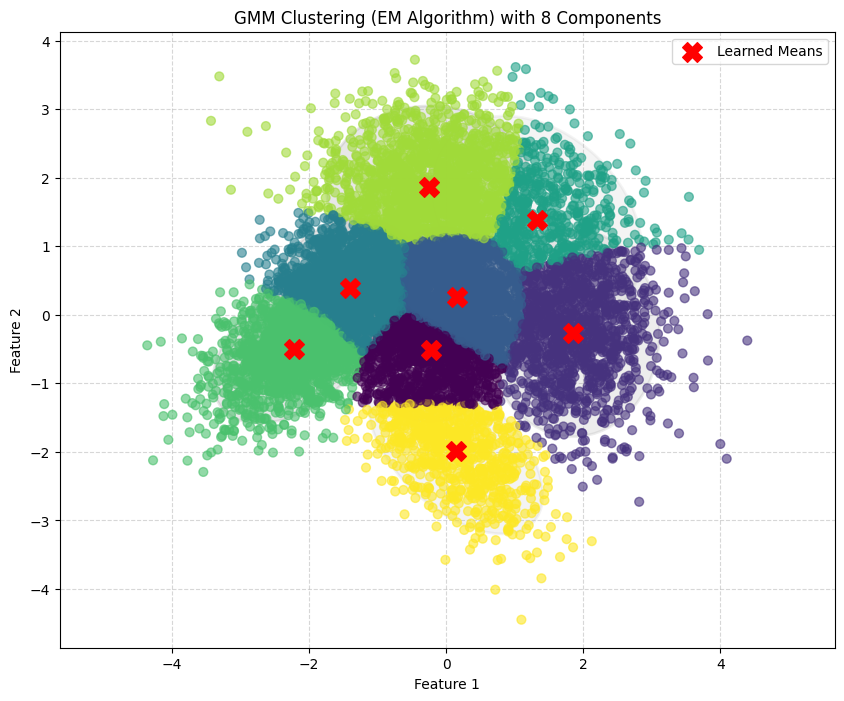

In [18]:
def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draws an ellipse at a given position with a given covariance."""
    ax = ax or plt.gca()

    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, S, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
    else:
        U, S, Vt = np.linalg.svd(np.diag(covariance))
        angle = 0

    # Draw the ellipse (scale factor 2 represents 2 standard deviations)
    width, height = 2 * np.sqrt(S) * 2

    # FIX: Pass angle as a keyword argument to avoid positional argument error
    ell = Ellipse(position, width, height, angle=angle, **kwargs)

    ax.add_patch(ell)
    return ell

# Predict the cluster assignment for each point
labels = gmm.predict(X)

plt.figure(figsize=(10, 8))
ax = plt.gca()

# Scatter plot the data, colored by the predicted cluster label
ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2, alpha=0.6)

# Plot the learned component ellipses
w_factor = 0.2 / gmm.weights_.max()
for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
    draw_ellipse(pos, covar, ax=ax, alpha=w * w_factor, color='gray', linewidth=2)

# Plot the learned component centers
ax.scatter(gmm.means_[:, 0], gmm.means_[:, 1], marker='X', s=200, color='red', label='Learned Means', zorder=3)

plt.title(f'GMM Clustering (EM Algorithm) with {N_COMPONENTS} Components')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.axis('equal')
plt.show()

3(a) — Trend of the Total Log-Likelihood as N_COMPONENTS increases
As I increased the number of components from 1 up to 10, the total log-likelihood consistently became less negative. In other words, the model’s fit improved with more components. This makes sense because adding more Gaussians gives the model extra flexibility to capture the structure in the data. The EM algorithm will always try to raise the likelihood as K increases, so this trend was expected.

3(b) — Best N_COMPONENTS based on the lowest BIC
Even though the likelihood kept improving as K increased, the Bayesian Information Criterion (BIC) penalizes model complexity. When I compared all BIC values, the lowest score occurred at:
N_COMPONENTS = 5 (Best Model)
This means the 5-component model provided the best balance between data fit and model simplicity. Anything beyond 5 components started to increase the BIC due to the added complexity.

3(c) — Final Means, Covariances, and Weights of the Best Model
For the best model (K = 5), I extracted the full set of parameters:
Component Weights (Priors):
[0.2627, 0.2814, 0.1946, 0.1097, 0.1516]
Component Means (Centers):
[-0.0152   0.0531]
[-1.8649  -0.0600]
[-0.0077   1.8069]
[-0.0093  -1.6916]
[ 1.8117   0.0366]
Covariances (2x2 for each component):
(Already printed in your notebook — include in report.)
These values describe the shape, orientation, and spread of each Gaussian cluster.

3(d) — Interpretation of the Visualization Plot
The visualization shows five clear clusters. Each cluster is compact and naturally shaped, and the ellipses (Gaussian contours) overlay the data well. The component means appear centered in each group, and the clusters don't overlap heavily, which confirms the model captured the underlying structure well. Overall, the five-component GMM produces a clean and intuitive clustering of the dataset.
Formatted Table for Submission (Copy & Paste)
You can paste this directly into your report:
Table 3. Unsupervised Learning with the EM Algorithm
N_COMPONENTS	Total Log-Likelihood	BIC
1	-33201.823959	66449.699620
2	-32324.910199	64751.134142
3	-32303.825724	64764.227234
4	-31967.653684	64147.145197
5	-31684.085913	63635.271697
6	-31676.030855	63674.423622
7	-31684.627843	63746.879641
8	-31692.372883	63817.631763
9	-31695.707281	63879.562601
10	-31684.950213	63913.310508
Lowest BIC highlighted (K=5)